## Comparing RF regressors

We decided to dedicate more time to play with hyperparameters and extract some conclusions.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_pickle("training_df")

In [3]:
df.head()

,cr,feat_03_syn,feat_04_syn,feat_10_syn,feat_12_syn,feat_13_syn,feat_15_syn,feat_20_syn,feat_24_syn,feat_26_syn,...,feat_11_mm,feat_16_mm,feat_17_mm,feat_21_mm,feat_22_mm,feat_23_mm,feat_30_mm,feat_33_mm,feat_34_mm,feat_41_mm
0,0.818182,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.008475,0.000000,0.009756,0.0,0.000000,0.000000,0.000000
1,0.755102,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.012712,0.000000,0.014634,0.0,0.000000,0.000000,0.000000
2,0.257576,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.055085,0.044776,0.039024,0.0,0.000000,0.000000,0.000000
3,0.381818,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.029661,0.014925,0.024390,0.0,0.009524,0.010417,0.007407
4,0.870968,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.007407,0.025424,0.000000,0.019512,0.0,0.000000,0.000000,0.000000


In [4]:
df.columns

Index(['cr', 'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_20_syn', 'feat_24_syn',
       'feat_26_syn', 'feat_27_syn', 'feat_35_syn', 'feat_37_syn',
       'feat_44_syn', 'feat_02_mm', 'feat_06_mm', 'feat_07_mm', 'feat_08_mm',
       'feat_09_mm', 'feat_11_mm', 'feat_16_mm', 'feat_17_mm', 'feat_21_mm',
       'feat_22_mm', 'feat_23_mm', 'feat_30_mm', 'feat_33_mm', 'feat_34_mm',
       'feat_41_mm'],
      dtype='object')

## Train-Test

In [5]:
X = df.drop(['cr'], axis=1)
y = df['cr']  # Labels

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [7]:
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(721898, 28) Output label(721898,)
Dimensions of datasets that will be used for testing : Input features(309386, 28) Output label(309386,)


## Evaluation tools and metrics

In [8]:
def fit(model, X_train, y_train):
    start = time()
    model.fit(X_train, y_train)
    end = time()
    result = end - start
    print('Training time = %.3f seconds' % result)
    #  The default score for RandomForestRegressor is R2
    score = model.score(X_train, y_train)
    print("R-squared:", score)
    return model

In [9]:
def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()
    

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    r2 = r2_score(y_test, y_pred)
    print('R2 score: %.2f' % r2 )
    return [mse, r2]

## RandomForestRegressor

### Gridsearch Iteration 1

In [12]:
final_model = RandomForestRegressor(n_estimators= 100,
 max_depth= 6,
 n_jobs=-1)
bm = fit(final_model, X_train, y_train)

Training time = 76.409 seconds
R-squared: 0.09397386095758542


### Gridsearch Iteration 2

In [10]:
 param_grid = {
    'max_depth': [6, 7, 8],
    'n_estimators':  [50, 100, 1000],
    'max_features': ['auto', 'sqrt']
}

In [11]:
# Create a based model
rf = RandomForestRegressor(random_state=42) # scoring default=”mse”
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 181.6min finished


{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 1000}

In [12]:
rf_model = RandomForestRegressor(n_estimators= 1000,max_depth= 8,n_jobs=-1, max_features='auto')
start = time()
rf_model.fit(X_train, y_train)
end = time()
result = end - start
print('Training time = %.3f seconds' % result)

Training time = 741.914 seconds


In [13]:
y_pred_rf = rf_model.predict(X_test)
rfMetrics_d8 = model_metrics(rf_model,y_test,y_pred_rf)

Mean squared error: 0.04
R2 score: 0.10


In [14]:
rfMetrics_d6 = [0.05, 0.093875]

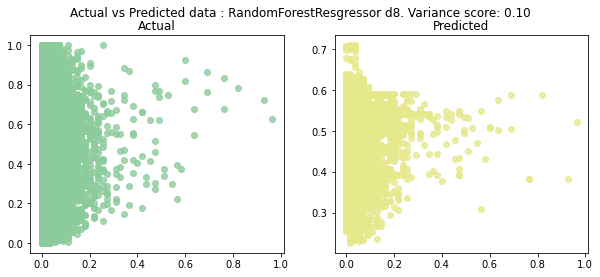

In [15]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rf, "RandomForestResgressor d8")

### RandomizedSearch Iteration 1

In [15]:
# Number of trees in random forest
n_estimators = [1000, 1200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [6, 8, 10, 11]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

In [17]:
rf = RandomForestRegressor(random_state=42) # scoring default=”mse”

In [18]:
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# let´s try first with the resample dataset
start = time()
rf_random.fit(X_train, y_train)
end = time()
result = end - start
print('Training time = %.3f seconds' % result)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 335.9min finished


Training time = 22258.713 seconds


In [19]:
rf_random.best_params_

{'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 11,
 'bootstrap': True}

In [16]:
rf_model2 = RandomForestRegressor(n_estimators= 1000,
 max_features= 'auto',
 max_depth= 11,
 bootstrap= True,
 n_jobs=-1)
start = time()
rf_model2.fit(X_train, y_train)
end = time()
result = end - start
print('Training time = %.3f seconds' % result)

Training time = 875.799 seconds


In [18]:
y_pred_rf2 = rf_model2.predict(X_test)
rfMetrics11 = model_metrics(rf_model2,y_test,y_pred_rf2)

Mean squared error: 0.04
R2 score: 0.11


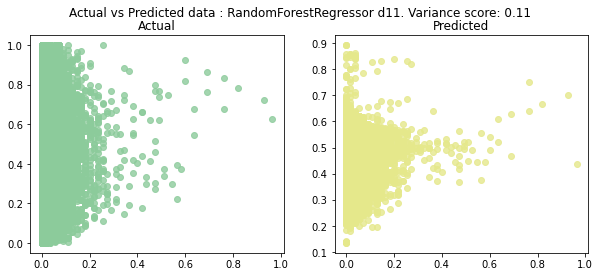

In [19]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rf2, "RandomForestRegressor d11")

In [20]:
import joblib
# save
joblib.dump(rf_model2, "rf_model_d11.joblib")

['rf_model_d11.joblib']

## Increasing tree depth

In [21]:
rf_model3 = RandomForestRegressor(n_estimators= 1000,
 max_features= 'auto',
 max_depth= 13,
 bootstrap= True,
 n_jobs=-1)
start = time()
rf_model3.fit(X_train, y_train)
end = time()
result = end - start
print('Training time = %.3f seconds' % result)

Training time = 977.671 seconds


In [22]:
y_pred_rf3 = rf_model3.predict(X_test)
rfMetrics_d13 = model_metrics(rf_model3,y_test,y_pred_rf3)

Mean squared error: 0.04
R2 score: 0.12


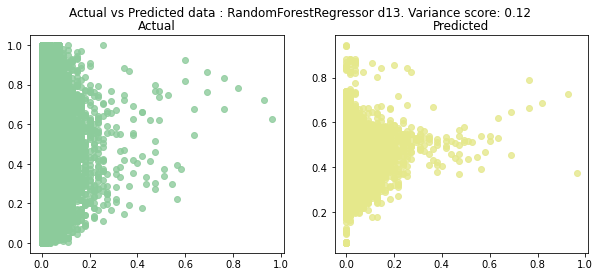

In [23]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rf3, "RandomForestRegressor d13")

In [24]:
joblib.dump(rf_model3, "rf_model_d13.joblib")

['rf_model_d13.joblib']

In [25]:
rf_model4 = RandomForestRegressor(n_estimators= 1000,
 max_features= 'auto',
 max_depth= 20,
 bootstrap= True,
 n_jobs=-1)
start = time()
rf_model4.fit(X_train, y_train)
end = time()
result = end - start
print('Training time = %.3f seconds' % result)

Training time = 1230.958 seconds


In [26]:
y_pred_rf4 = rf_model4.predict(X_test)
rfMetrics_d20 = model_metrics(rf_model4,y_test,y_pred_rf4)

Mean squared error: 0.04
R2 score: 0.12


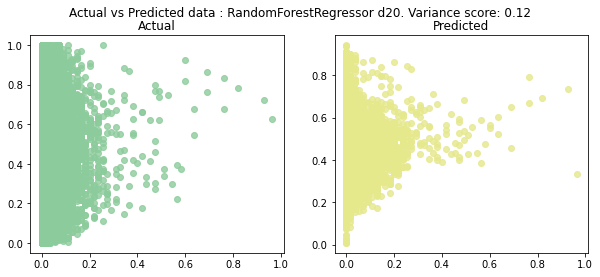

In [27]:
two_d_compare(X_test['feat_02_mm'], y_test, y_pred_rf4, "RandomForestRegressor d20")

In [28]:
joblib.dump(rf_model4, "rf_model_d20.joblib")

['rf_model_d20.joblib']

# Comparison graph

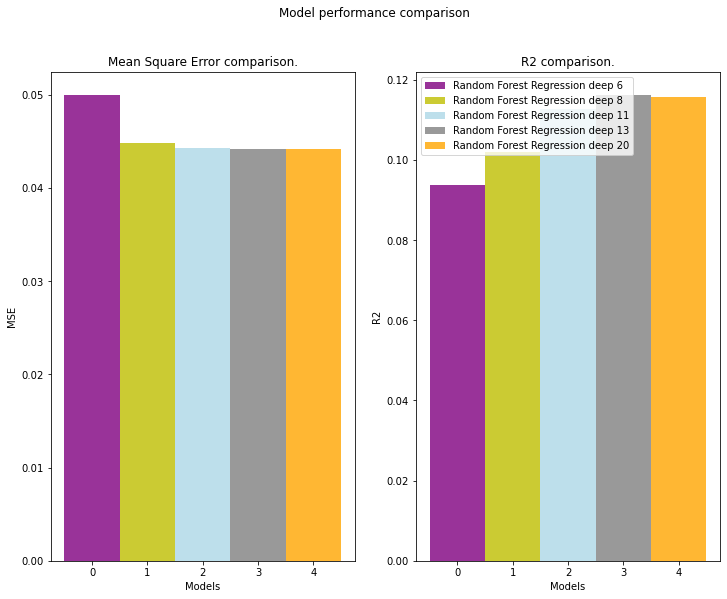

In [31]:
n_groups = 1
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8


area = 60
# First subplot
ax = plt.subplots(ncols=2, figsize=(12,9))
plt.suptitle('Model performance comparison')

plt.subplot(121)
index = np.arange(n_groups)
bar_width = 1
opacity = 0.8

rects1 = plt.bar(index, rfMetrics_d6[0], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression deep 6')

rects2 = plt.bar(index + bar_width, rfMetrics_d8[0], bar_width,
alpha=opacity,
color='y',
label='Random Forest Regression deep 8')

rects3 = plt.bar(index + bar_width*2, rfMetrics11[0], bar_width,
alpha=opacity,
color='lightblue',
label='Random Forest Regression deep 11')

rects4 = plt.bar(index + bar_width*3, rfMetrics_d13[0], bar_width,
alpha=opacity,
color='grey',
label='Random Forest Regression deep 13')

rects5 = plt.bar(index + bar_width*4, rfMetrics_d20[0], bar_width,
alpha=opacity,
color='orange',
label='Random Forest Regression deep 20')

plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Square Error comparison.')

plt.subplot(122)

rects1 = plt.bar(index, rfMetrics_d6[1], bar_width,
alpha=opacity,
color='purple',
label='Random Forest Regression deep 6')

rects2 = plt.bar(index + bar_width, rfMetrics_d8[1], bar_width,
alpha=opacity,
color='y',
label='Random Forest Regression deep 8')

rects3 = plt.bar(index + bar_width*2, rfMetrics11[1], bar_width,
alpha=opacity,
color='lightblue',
label='Random Forest Regression deep 11')


rects4 = plt.bar(index + bar_width*3, rfMetrics_d13[1], bar_width,
alpha=opacity,
color='grey',
label='Random Forest Regression deep 13')

rects5 = plt.bar(index + bar_width*4, rfMetrics_d20[1], bar_width,
alpha=opacity,
color='orange',
label='Random Forest Regression deep 20')

plt.xlabel('Models')
plt.ylabel('R2')
plt.title('R2 comparison.')

plt.legend()
plt.show()

## Conclusion

We have researched a bit deeper the different possibilities with a RandomForestRegressor. By increasing the tree depth and the number of estimators we were able to predict a wider range of completion rate values (higher than 0.6). We select the model with 1000 estimators and a depth of 13 as our candidate for the prediction tool.